<h1><b>Emergency NYC - Linear Regression Training</b></h1>
By Alexander L. Myfia, Alrismany Abigail S., Viriya Savoeun

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functools import reduce
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
terms = ["EmergencyNYC", "acute_hydrocephalus", "autoimmune", "clot",
        "delirium", "dementia", "donor", "emts",
        "gunshot", "gynecologist", "hepatic_coma", "incision",
        "internal", "metastasized", "neurosurgery", "organ_transplant",
        "paediatric", "paramedics", "seizures", "spinal_cord_injury",
        "stroke", "trauma", "tumor", "vaccine"]

df_set = [pd.read_csv(f"keywords/{t}.csv", delimiter=',', on_bad_lines='skip') for t in terms]

In [12]:
for i in range(len(df_set)):
    df_set[i].reset_index(inplace = True)
    df_set[i].rename(columns={'index' : 'Date'},inplace=True)
    df_set[i].rename(columns={'Category: All categories':f'{terms[i]}'},inplace=True)
    df_set[i].fillna(0, inplace=True)
    df_set[i].drop(index=[0], inplace=True)

In [13]:
NewDF = reduce(lambda left, right: left.merge(right, on='Date'), df_set)
NewDF.head()

columns = terms.copy()
NewDF[columns] = NewDF[columns].apply(pd.to_numeric,  errors='coerce')

med_terms = terms.copy()
med_terms.remove('EmergencyNYC')
NewDF['Average'] = NewDF[med_terms].mean(axis=1)

NewDF.head()

,Date,EmergencyNYC,acute_hydrocephalus,autoimmune,clot,delirium,dementia,donor,emts,gunshot,...,organ_transplant,paediatric,paramedics,seizures,spinal_cord_injury,stroke,trauma,tumor,vaccine,Average
0,2023-02-26,0,0,85,92,69,63,80,63,100,...,74,54,60,94,79,78,95,70,55,72.043478
1,2023-03-05,0,0,87,84,68,65,72,71,58,...,66,57,67,95,75,71,94,85,53,70.391304
2,2023-03-12,0,0,82,84,75,60,66,69,47,...,56,52,61,92,78,69,91,80,46,65.173913
3,2023-03-19,0,0,85,87,79,76,73,0,58,...,85,56,65,96,81,72,92,83,51,70.608696
4,2023-03-26,67,100,94,84,77,65,76,43,79,...,76,56,67,100,80,74,92,79,48,77.869565


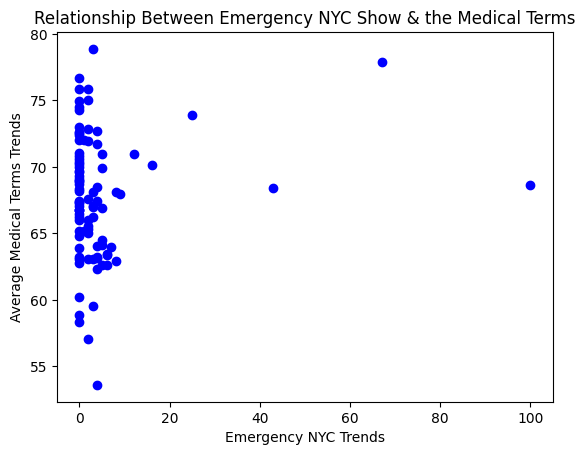

Correlation (r) = 0.13193030413897464


In [14]:
plt.scatter(NewDF['EmergencyNYC'],NewDF['Average'],color='blue')
plt.xlabel('Emergency NYC Trends')
plt.ylabel('Average Medical Terms Trends')
plt.title('Relationship Between Emergency NYC Show & the Medical Terms')

plt.show()
correlation = NewDF['EmergencyNYC'].corr(NewDF['Average'])
print(f"Correlation (r) = {correlation}")

In [15]:
NewDF.to_csv('Emergency_NYC.csv', index=False)
dataset = pd.read_csv("Emergency_NYC.csv", delimiter=',',on_bad_lines='skip')
dataset = dataset[['EmergencyNYC', 'Average']]
dataset.head()

,EmergencyNYC,Average
0,0,72.043478
1,0,70.391304
2,0,65.173913
3,0,70.608696
4,67,77.869565


Proportion: 50:50
MSE: 21.46640262490052 | R^2: -0.36147791680723107


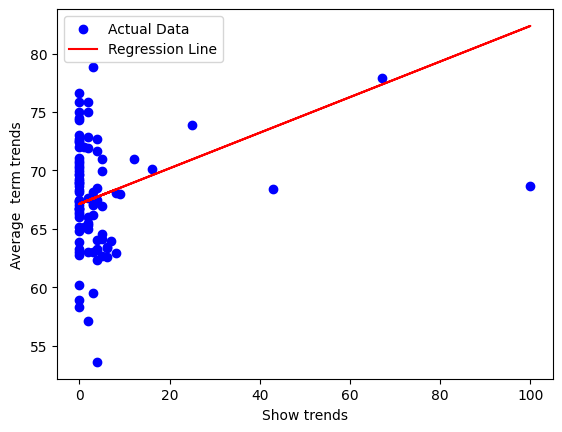

Proportion: 60:40
MSE: 21.901258267860825 | R^2: -0.4274304238687081


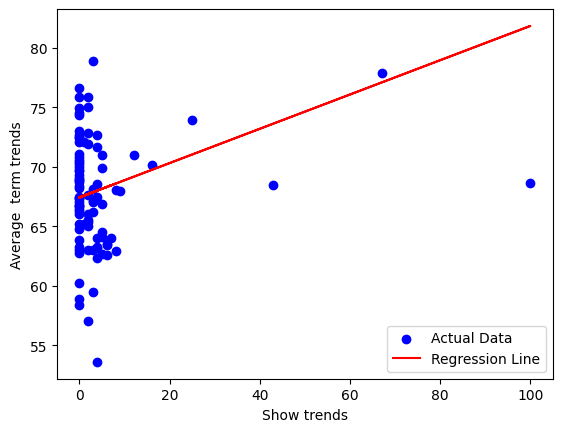

Proportion: 70:30
MSE: 19.40911488523587 | R^2: -0.2578621548144231


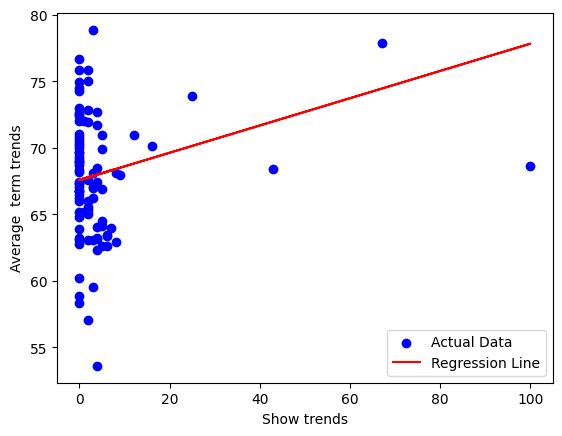

Proportion: 80:20
MSE: 8.618535402593693 | R^2: -0.05584550319980286


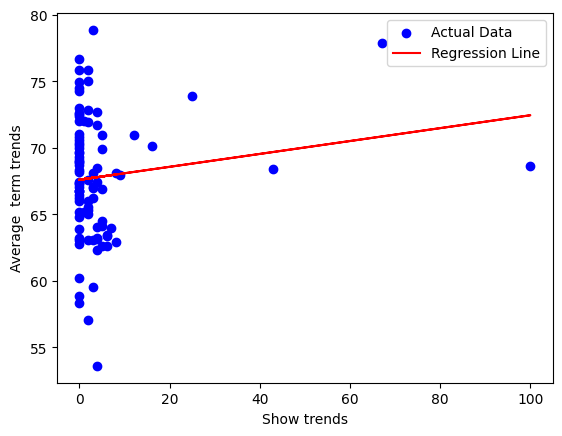

In [16]:
X, Y = dataset[['EmergencyNYC']], dataset[['Average']]
lr_model = LinearRegression()
split_prop = [0.5, 0.4, 0.3, 0.2]

for sp in split_prop:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = sp, random_state = 2)
    lr_model.fit(x_train, y_train)
    y_pred = lr_model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    
    print(f"Proportion: {int(100 - sp*100)}:{int(sp*100)}")
    print(f"MSE: {mse} | R^2: {r2}")
    
    plt.scatter(X, Y, color = 'blue', label = 'Actual Data')
    plt.plot(X, lr_model.predict(X), color = 'red', label = 'Regression Line')
    plt.xlabel("Show trends")
    plt.ylabel("Average  term trends")
    plt.legend()
    plt.show()

<hr>